In [6]:
%matplotlib inline
#pip install folium
import seaborn as sns
import statsmodels.formula.api as smf
from sklearn.linear_model import LinearRegression
from sklearn import metrics
from sklearn.model_selection  import train_test_split
import numpy as np
from scipy.stats import norm # for scientific Computing
from scipy import stats, integrate
import matplotlib.pyplot as plt

#from sklearn.datasets import fetch_mldata
from sklearn.decomposition import PCA
from sklearn.preprocessing import StandardScaler
from sklearn import metrics

import pandas as pd

In [7]:
df= pd.read_csv('KSI.csv')

In [8]:
df.head()

,X,Y,INDEX_,ACCNUM,YEAR,DATE,TIME,HOUR,STREET1,STREET2,...,PASSENGER,SPEEDING,AG_DRIV,REDLIGHT,ALCOHOL,DISABILITY,POLICE_DIVISION,HOOD_ID,NEIGHBOURHOOD,ObjectId
0,-8.844611e+06,5.412414e+06,3387730,892658,2006,2006/03/11 05:00:00+00,852,8,BLOOR ST W,DUNDAS ST W,...,<Null>,<Null>,Yes,<Null>,<Null>,<Null>,D11,88,High Park North (88),1
1,-8.844611e+06,5.412414e+06,3387731,892658,2006,2006/03/11 05:00:00+00,852,8,BLOOR ST W,DUNDAS ST W,...,<Null>,<Null>,Yes,<Null>,<Null>,<Null>,D11,88,High Park North (88),2
2,-8.816480e+06,5.434843e+06,3388101,892810,2006,2006/03/11 05:00:00+00,915,9,MORNINGSIDE AVE,SHEPPARD AVE E,...,<Null>,<Null>,Yes,Yes,<Null>,<Null>,D42,131,Rouge (131),3
3,-8.816480e+06,5.434843e+06,3388102,892810,2006,2006/03/11 05:00:00+00,915,9,MORNINGSIDE AVE,SHEPPARD AVE E,...,<Null>,<Null>,Yes,Yes,<Null>,<Null>,D42,131,Rouge (131),4
4,-8.822759e+06,5.424516e+06,3387793,892682,2006,2006/03/12 05:00:00+00,240,2,EGLINTON AVE E,COMMONWEALTH AVE,...,<Null>,<Null>,<Null>,<Null>,Yes,<Null>,D41,138,Eglinton East (138),5


In [9]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 16860 entries, 0 to 16859
Data columns (total 57 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   X                16860 non-null  float64
 1   Y                16860 non-null  float64
 2   INDEX_           16860 non-null  int64  
 3   ACCNUM           16860 non-null  int64  
 4   YEAR             16860 non-null  int64  
 5   DATE             16860 non-null  object 
 6   TIME             16860 non-null  int64  
 7   HOUR             16860 non-null  int64  
 8   STREET1          16860 non-null  object 
 9   STREET2          16860 non-null  object 
 10  OFFSET           16860 non-null  object 
 11  ROAD_CLASS       16860 non-null  object 
 12  DISTRICT         16860 non-null  object 
 13  WARDNUM          16860 non-null  object 
 14  DIVISION         16860 non-null  object 
 15  LATITUDE         16860 non-null  float64
 16  LONGITUDE        16860 non-null  float64
 17  LOCCOORD    

In [10]:
df.columns

Index(['X', 'Y', 'INDEX_', 'ACCNUM', 'YEAR', 'DATE', 'TIME', 'HOUR', 'STREET1',
       'STREET2', 'OFFSET', 'ROAD_CLASS', 'DISTRICT', 'WARDNUM', 'DIVISION',
       'LATITUDE', 'LONGITUDE', 'LOCCOORD', 'ACCLOC', 'TRAFFCTL', 'VISIBILITY',
       'LIGHT', 'RDSFCOND', 'ACCLASS', 'IMPACTYPE', 'INVTYPE', 'INVAGE',
       'INJURY', 'FATAL_NO', 'INITDIR', 'VEHTYPE', 'MANOEUVER', 'DRIVACT',
       'DRIVCOND', 'PEDTYPE', 'PEDACT', 'PEDCOND', 'CYCLISTYPE', 'CYCACT',
       'CYCCOND', 'PEDESTRIAN', 'CYCLIST', 'AUTOMOBILE', 'MOTORCYCLE', 'TRUCK',
       'TRSN_CITY_VEH', 'EMERG_VEH', 'PASSENGER', 'SPEEDING', 'AG_DRIV',
       'REDLIGHT', 'ALCOHOL', 'DISABILITY', 'POLICE_DIVISION', 'HOOD_ID',
       'NEIGHBOURHOOD', 'ObjectId'],
      dtype='object')

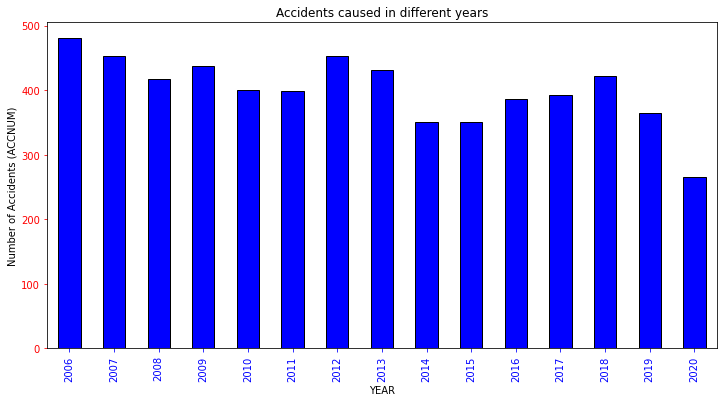

In [18]:
Num_accident = df.groupby('YEAR')['ACCNUM'].nunique()
plt.figure(figsize=(12,6))
plt.title("Accidents caused in different years")
plt.ylabel('Number of Accidents (ACCNUM)')

ax = plt.gca()
ax.tick_params(axis='x', colors='blue')
ax.tick_params(axis='y', colors='red')
my_colors = list('rgbkymc')   #red, green, blue, black, etc.
Num_accident.plot(
    kind='bar', 
    color='blue',
    edgecolor='black'
)
#Num_accident.plot(kind='bar',color= my_colors)
plt.show()

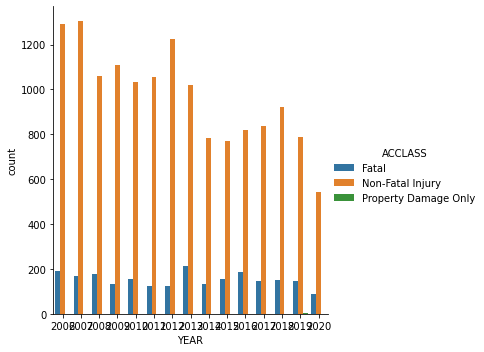

In [23]:
sns.catplot(x='YEAR', kind='count', data=df,  hue='ACCLASS')


I break down the subset of dataframe the neccessary variables

In [12]:
feature_lst=['DATE','HOUR','STREET1', 'STREET2','DISTRICT','LATITUDE','LONGITUDE','LOCCOORD','TRAFFCTL','VISIBILITY','LIGHT','RDSFCOND','ACCLASS','IMPACTYPE','INVAGE','PEDESTRIAN','CYCLIST','AUTOMOBILE','MOTORCYCLE','TRUCK','TRSN_CITY_VEH','EMERG_VEH','PASSENGER','SPEEDING','AG_DRIV','REDLIGHT','ALCOHOL','DISABILITY','INJURY']

In [13]:
df_sel=df[feature_lst].copy()
df_sel.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 16860 entries, 0 to 16859
Data columns (total 29 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   DATE           16860 non-null  object 
 1   HOUR           16860 non-null  int64  
 2   STREET1        16860 non-null  object 
 3   STREET2        16860 non-null  object 
 4   DISTRICT       16860 non-null  object 
 5   LATITUDE       16860 non-null  float64
 6   LONGITUDE      16860 non-null  float64
 7   LOCCOORD       16860 non-null  object 
 8   TRAFFCTL       16860 non-null  object 
 9   VISIBILITY     16860 non-null  object 
 10  LIGHT          16860 non-null  object 
 11  RDSFCOND       16860 non-null  object 
 12  ACCLASS        16860 non-null  object 
 13  IMPACTYPE      16860 non-null  object 
 14  INVAGE         16860 non-null  object 
 15  PEDESTRIAN     16860 non-null  object 
 16  CYCLIST        16860 non-null  object 
 17  AUTOMOBILE     16860 non-null  object 
 18  MOTORC

In [14]:
target='ACCLASS'
# Create arrays for the features and the response variable
print(df_sel.shape)
# set X and y
y = df_sel[target]
X1 = df_sel.drop(target, axis=1)
X = pd.get_dummies(X1, drop_first=True)
print(X.shape)

(16860, 29)
(16860, 7926)


In [15]:
train_X, valid_X, train_y, valid_y = train_test_split(X,y, test_size=0.4, random_state=1)

In [16]:
logit_reg = LogisticRegression()
logit_reg.fit(train_X, train_y)

NameError: name 'LogisticRegression' is not defined

In [ ]:
logit_reg.intercept_

array([-0.00085966,  0.00121881, -0.00035915])

In [ ]:
logit_reg.coef_

array([[-2.61288200e-10, -6.35417429e-18, -2.07463057e-17, ...,
        -3.49659681e-20, -3.17736215e-20, -1.80157686e-19],
       [ 2.60546097e-10,  6.34244902e-18,  2.06982295e-17, ...,
         3.49025345e-20,  3.17207625e-20,  1.79727921e-19],
       [-9.33578047e-10, -3.42375853e-03, -1.14082222e-02, ...,
        -1.52824604e-05, -1.97643567e-05, -9.20062721e-05]])

In [ ]:
logit_reg = LogisticRegression(solver='liblinear', C=1e42, random_state=1)
logit_reg.fit(train_X, train_y)


LogisticRegression(C=1e+42, random_state=1, solver='liblinear')

In [ ]:
print(pd.DataFrame({'coef': logit_reg.coef_[0]}, index=X.columns))

                                     coef
ACCNUM                      -2.552049e-10
HOUR                        -6.378037e-18
LATITUDE                    -2.072033e-17
LONGITUDE                    3.764208e-17
DATE_2006/01/02 05:00:00+00  0.000000e+00
...                                   ...
INJURY_Fatal                 5.233560e-20
INJURY_Major                -2.298304e-19
INJURY_Minimal              -3.576819e-20
INJURY_Minor                -3.338227e-20
INJURY_None                 -1.742094e-19

[7927 rows x 1 columns]


In [ ]:
logit_reg_prob = logit_reg.predict_proba(valid_X)

In [ ]:
logit_reg_prob

array([[9.94451747e-01, 5.54354994e-03, 4.70349360e-06],
       [2.13820498e-01, 7.86179078e-01, 4.23911682e-07],
       [1.14602756e-01, 8.85394686e-01, 2.55833786e-06],
       ...,
       [5.34990807e-02, 9.46488362e-01, 1.25577981e-05],
       [1.28011440e-01, 8.71960698e-01, 2.78622843e-05],
       [6.13685732e-02, 9.38630877e-01, 5.49767146e-07]])

In [ ]:
logit_reg_pred = logit_reg.predict(valid_X)

In [ ]:
logit_result = pd.DataFrame({'actual' : valid_y,
                             'p_0' : [p[0] for p in logit_reg_prob],
                             'p_1' : [p[1] for p in logit_reg_prob],
                             'predicted': logit_reg_pred})
logit_result

,actual,p_0,p_1,predicted
15374,Fatal,0.091418,0.908576,Non-Fatal Injury
7768,Non-Fatal Injury,0.375063,0.375182,Non-Fatal Injury
4280,Non-Fatal Injury,0.374769,0.374873,Non-Fatal Injury
5834,Non-Fatal Injury,0.374670,0.374778,Non-Fatal Injury
15962,Fatal,0.091426,0.908568,Non-Fatal Injury
...,...,...,...,...
12989,Non-Fatal Injury,0.177855,0.821879,Non-Fatal Injury
13328,Non-Fatal Injury,0.143585,0.856340,Non-Fatal Injury
5265,Non-Fatal Injury,0.374466,0.374573,Non-Fatal Injury
1735,Non-Fatal Injury,0.374323,0.374412,Non-Fatal Injury


In [ ]:
classificationSummary(train_y, logit_reg.predict(train_X))

Confusion Matrix (Accuracy 1.0000)

       Prediction
Actual    0    1    2
     0 1391    0    0
     1    0 8723    0
     2    0    0    2


In [ ]:
classificationSummary(valid_y, logit_reg.predict(valid_X))

Confusion Matrix (Accuracy 0.9631)

       Prediction
Actual    0    1
     0  699  207
     1   42 5796


PEDESTRIAN

In [ ]:
road['PEDESTRIAN'].value_counts().sort_values(ascending = False)

<Null>    10033
Yes        6827
Name: PEDESTRIAN, dtype: int64

<AxesSubplot:>

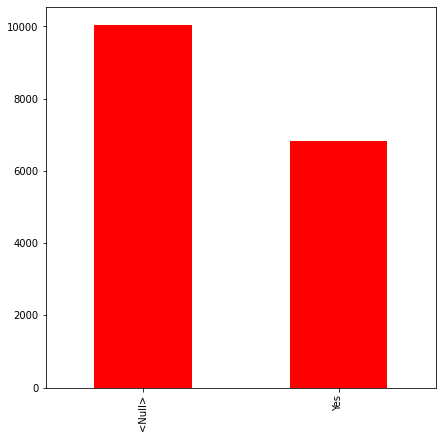

In [ ]:
road['PEDESTRIAN'].value_counts().sort_values(ascending = False).plot(kind = 'bar', color = 'red', figsize = (7,7))

In [ ]:
pedestrian= road.groupby('PEDESTRIAN')['INVTYPE'].count().sort_values(ascending = False).reset_index()
pedestrian.head(20)

,PEDESTRIAN,INVTYPE
0,<Null>,10033
1,Yes,6827


<AxesSubplot:>

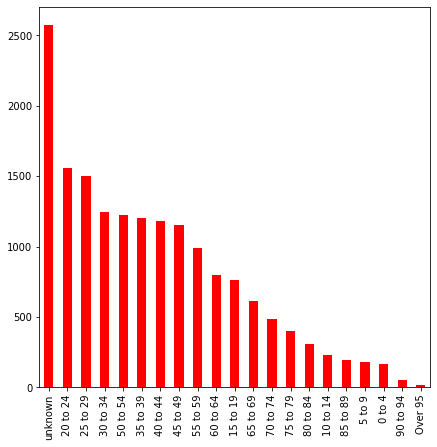

In [ ]:
road['INVAGE'].value_counts().sort_values(ascending = False).plot(kind = 'bar', color = 'red', figsize = (7,7))

In [ ]:
district = road.groupby('DISTRICT')['PEDESTRIAN'].count().sort_values(ascending = False).reset_index()
district.head(20)

,DISTRICT,PEDESTRIAN
0,Toronto and East York,5617
1,Etobicoke York,3884
2,Scarborough,3798
3,North York,3343
4,<Null>,141
5,Toronto East York,77


In [ ]:
pedestrian_age = road.groupby('INVAGE')['PEDESTRIAN'].count().sort_values(ascending = False).reset_index()
pedestrian_age.head(20)

,INVAGE,PEDESTRIAN
0,unknown,2573
1,20 to 24,1561
2,25 to 29,1504
3,30 to 34,1248
4,50 to 54,1222
5,35 to 39,1205
6,40 to 44,1181
7,45 to 49,1153
8,55 to 59,993
9,60 to 64,796
